## Meta M1 - 14 de novembro de 2022: Visualizações adicionais

**Autores:**
**Miguel Fernandes** 2016014470, **Stephanie Batista** 2019114900

Este notebook tem como objetivo mostrar as análises gráficas adicionais para além das que foram feitas no notebook principal (main). Embora não sejam críticas para o entendimento do dataset, ajudam a uma melhor análise dos dados e posíveis relações entre os atributos, permitindo também a exploração mais profunda da biblioteca seaborn e matplotlib.

### Preparação do dataset para visualizar

In [1]:
# Manipulação de dados
import numpy as np
import pandas as pd

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("data\Airline-Passenger-Satisfaction.csv")
data , excess_data = train_test_split(data, test_size=0.615, random_state=25)
data = data.drop(data.columns[[0,1]], axis=1) # Apaga as colunas 'Unnamed:0' e 'id' 

In [3]:
# Reordenação das colunas para facilitar a localização e indexação dos atributos

first_columns = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes','Age']
last_columns = [col for col in data.columns if col not in first_columns]

data = data[first_columns+last_columns]

In [4]:
data.columns= data.columns.str.lower().str.replace(' ','_')

In [5]:
data_ordinal = data.iloc[:,8:-1]
data_numerical = data.iloc[:,0:4]
data_categorical = data.select_dtypes(exclude=[np.number])

### Visualizações

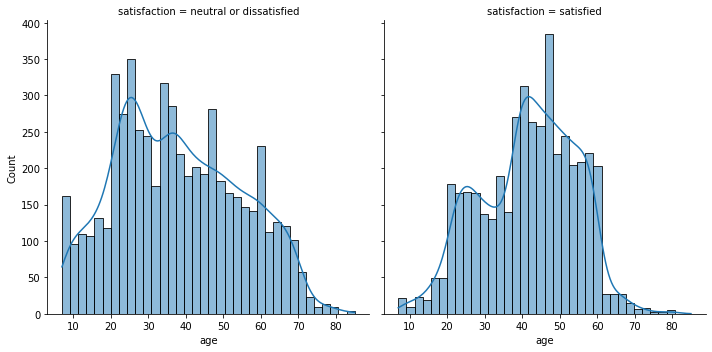

In [6]:
# Existirá uma relação entre a idade do passageiro e a sua satisfação final?

sns.displot(data=data, x='age', col='satisfaction', kde=True )

Com base na observação da distribuição do gráfico obtido, conclui-se que as pessoas com **menos de 40 anos** se mostram **menos** satisfeitas com os voos da companhia.  <p>   De maneira oposta, observa-se que a distribuição das pessoas satisfeitas se encontra **mais enviesada** para os limites de idades **superiores a 40 anos**.

[Text(0.5, 0, 'Tipo de passageiro'),
 Text(0, 0.5, 'Idade'),
 Text(0.5, 1.0, 'Relação entre a classe de viagem e a sua idade')]

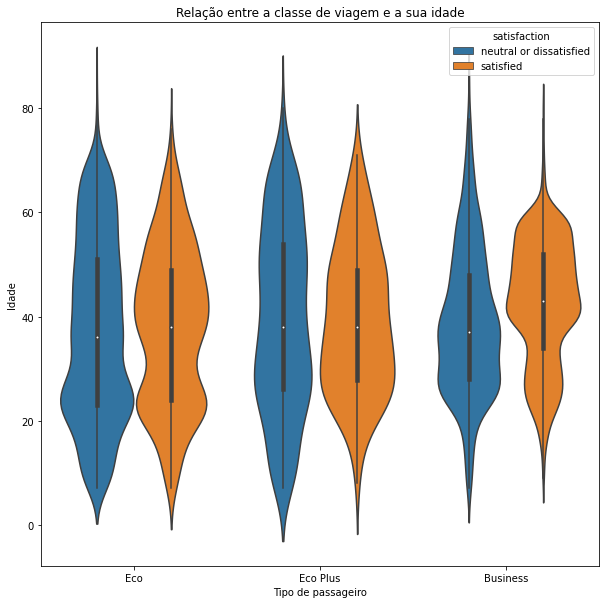

In [7]:
# Relação entre idades dos passageiros, o tipo de classe onde viajam e o seu nível de satisfação

plt.figure(figsize = (10,10))
ax = sns.violinplot(x="class", y="age",hue='satisfaction', data=data)
ax.set(xlabel='Tipo de passageiro', ylabel='Idade',
         title='Relação entre a classe de viagem e a sua idade')

A partir dos violin-plots acima conclui-se que a média de idades dos passageiros satisfeitos que viajam na **business class** é superior às restantes, sendo a única acima dos 40 anos.

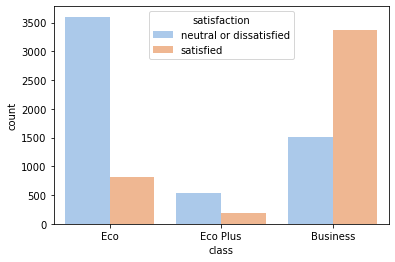

In [8]:
# Satisfação dos passageiros por tipos de classes de viagens

sns.countplot(x = 'class', hue = 'satisfaction', palette = "pastel", data = data)
plt.show()

Verifica-se que existem sensivelmente tantos passageiros a voar em **business class** como em **eco class**, no entanto os níveis de satisfação diferem bastante. Em **business class** observam-se elevados níveis de satisfação dos passageiros, enquanto em **eco class** o número de passageiros neutral/dissatisfied é muito maior.

<AxesSubplot:xlabel='inflight_entertainment', ylabel='flight_distance'>

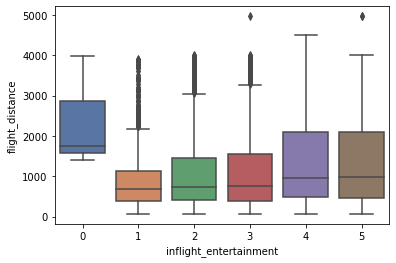

In [9]:
sns.boxplot(x = "inflight_entertainment", y = "flight_distance", palette = "deep", data = data)

<AxesSubplot:xlabel='leg_room_service', ylabel='flight_distance'>

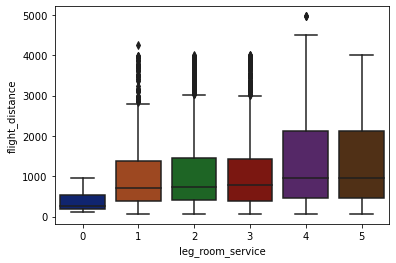

In [10]:
sns.boxplot(x = "leg_room_service", y = "flight_distance", palette = "dark", data = data)

Com os box-plots acima, observa-se que, quanto maiores as distâncias de voo, melhor classificação tem o **inflight_service** e o **leg_room_service**.

<AxesSubplot:ylabel='arrival_delay_in_minutes'>

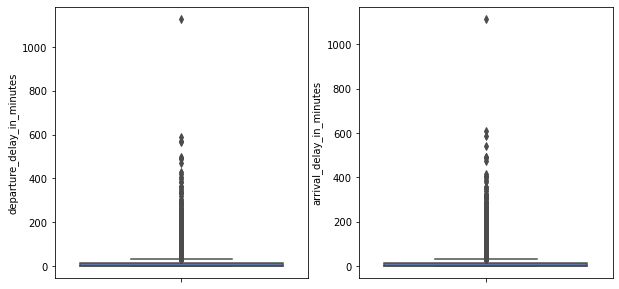

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.boxplot( y = "departure_delay_in_minutes", palette = "deep", data = data , ax= axes[0])
sns.boxplot( y = "arrival_delay_in_minutes", palette = "deep", data = data ,  ax=axes[1])

Com base nos box-plots das variáveis **departure_delay_in_minutes** e **arrival_delay_in_minutes**, observa-se que parecem ser numerosos os **outliers** no dataset. No entanto, devido à não simetria destes atributos, as instâncias que se encontram no intervalo 1.5x o tamanho do intervalo interquartil fora do terceiro quartil, podem não ser verdadeiros outliers (pois o intervalo interquartil é muito pequeno). Contudo, as instâncias isoladas do restante grupo de instâncias (acima dos 1000 min) podem ser verdadeiros outliers. 